# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
# Atualizando scikit pra usar plot_confusion_matrix que estava dando erro
# pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('base_final.csv')

# Dropa a coluna indesejada
df = df.drop(columns=['Unnamed: 0'])

# As variáveis, seus tipos de dados, 16650 not-null em todas as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  object 
 1   posse_de_veiculo                        16650 non-null  object 
 2   posse_de_imovel                         16650 non-null  object 
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [3]:
# Separar features (X) e label (y)
# Supondo que 'mau' seja a variável resposta
X = df.drop(columns=['mau'])
y = df['mau']

# Converter variáveis categóricas em variáveis dummy
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em treino (70%) e validação (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar as formas dos conjuntos de treino e validação
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (11655, 28)
X_val shape: (4995, 28)
y_train shape: (11655,)
y_val shape: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

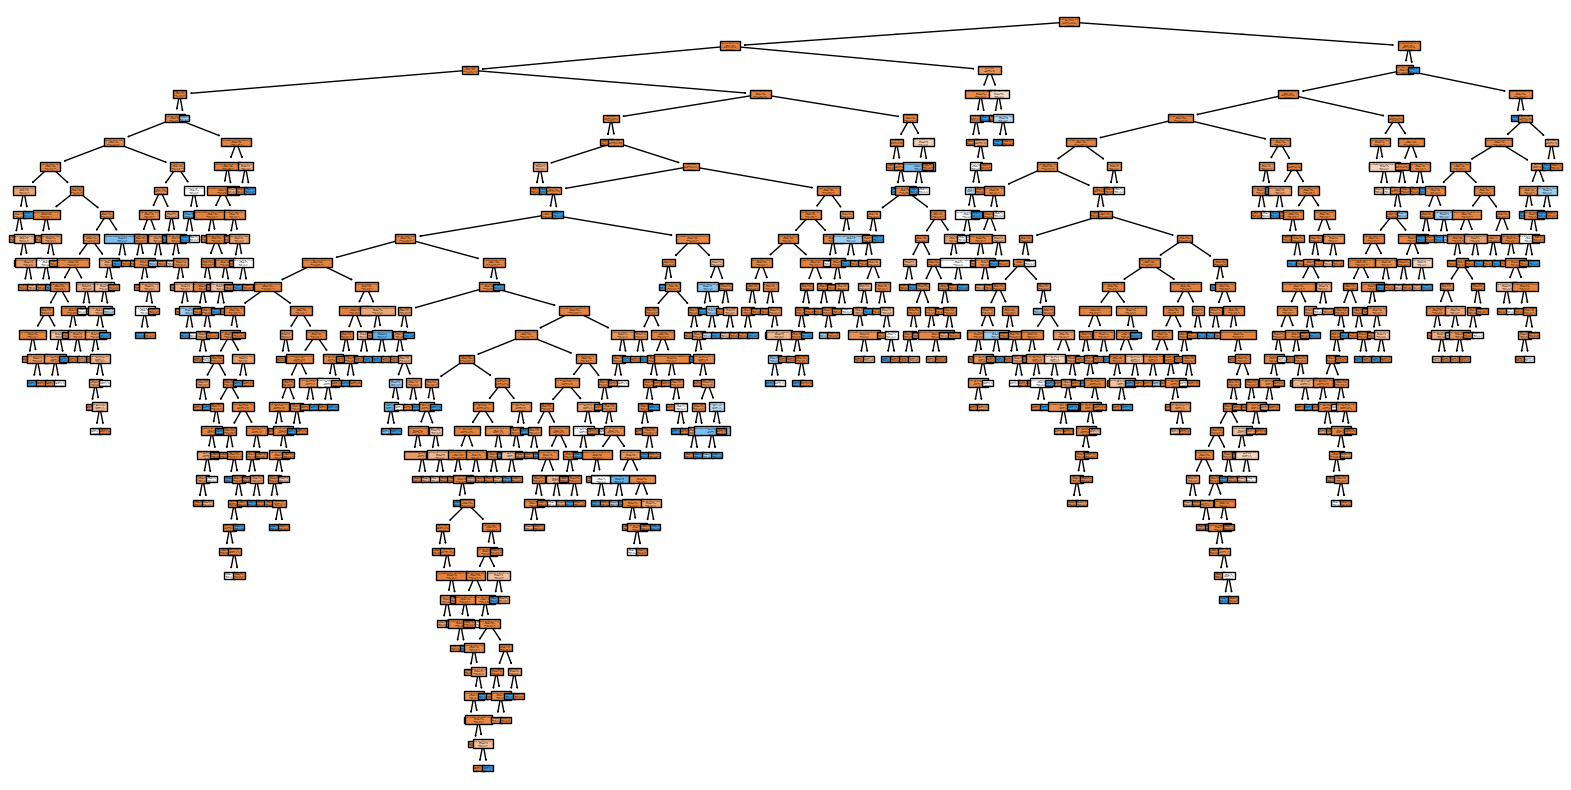

In [4]:
# Definir objeto com a função da árvore de decisão vista em aula
clf = DecisionTreeClassifier(random_state=100)

# Treinar modelo com os dados que você separou para treinamento
clf.fit(X_train, y_train)

# Visualizar árvore
plt.figure(figsize=(20, 10))
plot_tree(clf,
          filled=True,
          class_names=['No', 'Yes'],
          feature_names=list(X.columns));
plt.show()

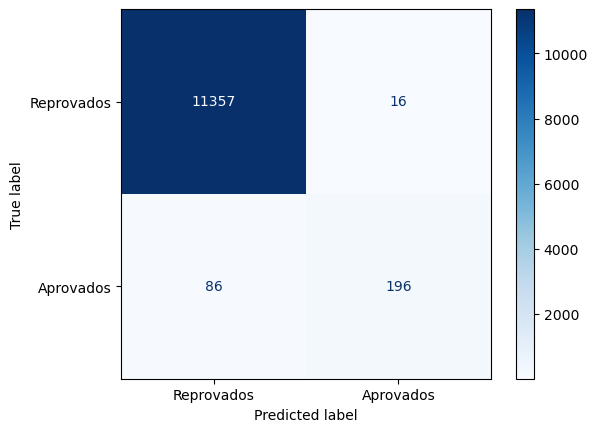

Acurácia da base de treinamento: 99.12484%


In [8]:
# Fazer previsões nos dados de validação
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_val)

# Calcular a matriz de confusão
cm = confusion_matrix(y_train, y_pred_train)
cm

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reprovados','Aprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Acurácia da base de treinamento
accuracy_train = accuracy_score(y_train, y_pred_train) * 100
print(f'Acurácia da base de treinamento: {round(accuracy_train, 5)}%')

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Relatório de Classificação:
               precision    recall  f1-score   support

  Reprovados       0.98      0.98      0.98      4887
   Aprovados       0.27      0.26      0.26       108

    accuracy                           0.97      4995
   macro avg       0.63      0.62      0.62      4995
weighted avg       0.97      0.97      0.97      4995



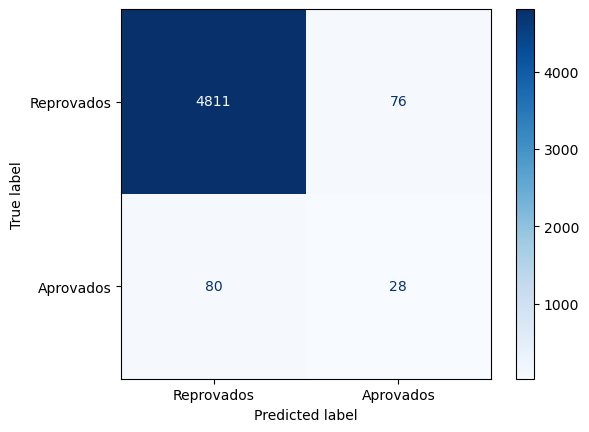

Acurácia na base de teste: 96.87688%
Diferença de acurácia de: 2.24796% a mais para base de treino.


In [14]:
# Exibir o relatório de classificação
report = classification_report(y_val, y_pred_test, target_names=['Reprovados','Aprovados'])
print("Relatório de Classificação:\n", report)

# Calcular a matriz de confusão
cm = confusion_matrix(y_val, y_pred_test)
cm

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reprovados','Aprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calcular a acurácia na base de teste + comparação
accuracy_test = accuracy_score(y_val, y_pred_test) * 100
print(f'Acurácia na base de teste: {round(accuracy_test, 5)}%')
print(f'Diferença de acurácia de: {round(accuracy_train-accuracy_test, 5)}% a mais para base de treino.')

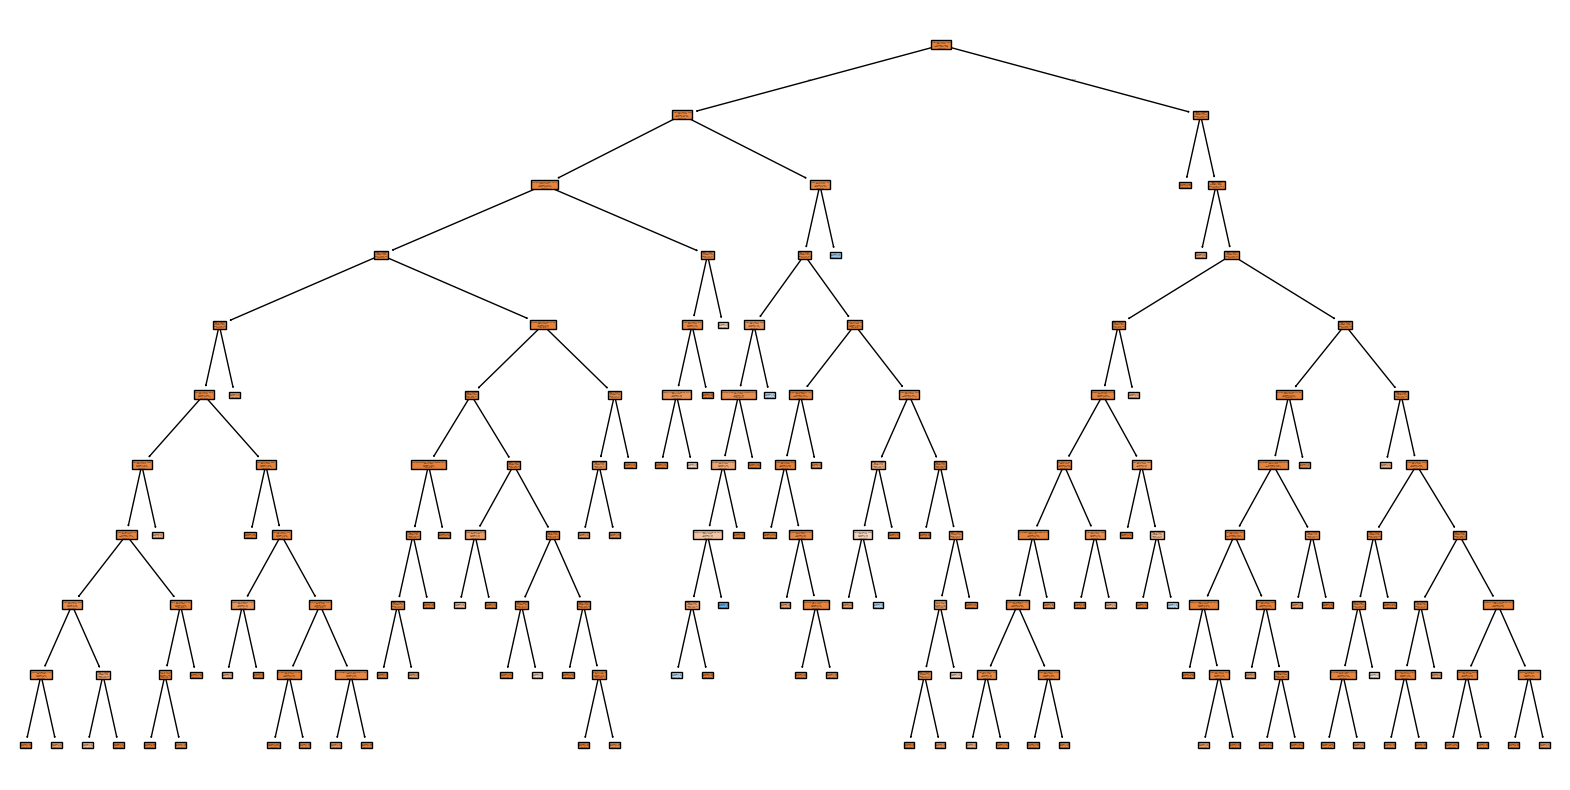

In [18]:
# Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123.
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar modelo com os dados teste
clf.fit(X_val, y_val)

# Visualizar árvore
plt.figure(figsize=(20, 10))
plot_tree(clf,
          filled=True,
          class_names=['No', 'Yes'],
          feature_names=list(X.columns));
plt.show()

In [20]:
# Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
y_pred_val = clf.predict(X_val)

# Exibir o relatório de classificação com a nova árvore
report_val = classification_report(y_val, y_pred_val, target_names=["Reprovados", "Aprovados"])
print("Relatório de Classificação (nova árvore):\n", report_val)

# Calcular a proporção de 'maus' classificados na base de validação
total_predicoes = len(y_pred_val)
proponentes_maus = sum(y_pred_val)
proporcao_maus = (proponentes_maus / total_predicoes) * 100
print(f'Proporção de proponentes classificados como "maus": {round(proporcao_maus, 2)}%')

Relatório de Classificação (nova árvore):
               precision    recall  f1-score   support

  Reprovados       0.98      1.00      0.99      4887
   Aprovados       0.65      0.20      0.31       108

    accuracy                           0.98      4995
   macro avg       0.81      0.60      0.65      4995
weighted avg       0.98      0.98      0.98      4995

Proporção de proponentes classificados como "maus": 0.68%


In [22]:
# Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
# Classificar todos os contratos como 'bons' (0)
y_pred_all_bons = [0] * len(y_val)

# Calcular a acurácia se todos os contratos fossem classificados como 'bons'
accuracy_all_bons = accuracy_score(y_val, y_pred_all_bons) * 100
print(f'Acurácia classificando todos os contratos como "bons": {round(accuracy_all_bons, 2)}%')

Acurácia classificando todos os contratos como "bons": 97.84%
